# Week 9 handin

## Exercise meanshift
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
![image.png](attachment:image.png)
4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

## 02 Status
Here is a status on the handin. How far you got. What is implemented and what is not

## 03 Solution part 1

In [5]:
%pylab inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['unique']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


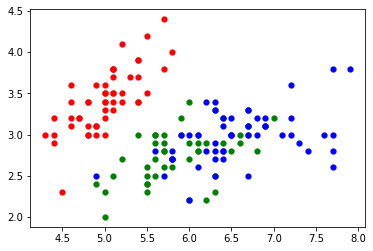

In [6]:
df = pd.read_csv('../data/iris_data.csv', decimal=",")
df.head
del df['Petal length']
del df['Petal width']

unique = df.Species.unique()

fig = plt.figure()
ax = fig.add_subplot(111)

for k, col in zip(unique, "rgb"):
    d = df[df.Species == k]
    x, y = d["Sepal length"], d["Sepal width"]
    ax.scatter(x, y, c=col, linewidth=0.2)

In [7]:
# 4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters 
# (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"].astype(str))

analyzer = MeanShift(bandwidth=estimate_bandwidth(df, quantile=0.15))
analyzer.fit(df)
labels = analyzer.labels_
cluster_centers = analyzer.cluster_centers_
n_clusters = len(np.unique(labels))

print(f"labels: {labels}, cluster centers: {cluster_centers}, n_clusters: {n_clusters}")

labels: [0 0 0 0 0 0 0 0 5 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 5 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 3 4 1 1 3 1
 1 1 4 1 1 1 3 3 1 1 4 3 1 1 3 1 1 1 1 3 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1
 1 1], cluster centers: [[4.97435897 3.38205128 0.        ]
 [6.45483871 3.         2.        ]
 [5.76451613 2.74193548 1.        ]
 [7.6        3.73333333 2.        ]
 [4.9        2.5        2.        ]
 [4.5        2.3        0.        ]], n_clusters: 6


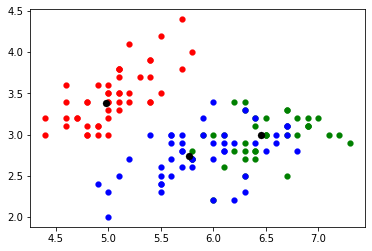

In [8]:
# 5. create a new scatter plot where each flower is colored according to cluster label

fig = plt.figure()
ax = fig.add_subplot(111)

for n, col in zip(range(n_clusters), "rgb"):
    data = df[labels == n]
    x = data["Sepal length"]
    y = data["Sepal width"]
    ax.scatter(x, y, c=col, linewidth=0.2)
    cluster_center = cluster_centers[n]
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
